In [4]:
import pandas as pd # library for interacting with data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # plotting library
import numpy as np

user = 'Emily'

if user=='Cat':
    project_home = '/Users/catcamacho/Box/CCP/HBN_study/'
elif user=='Emily':
    project_home = '/Users/emilyfurtado/Box/HBN_study/'

# load MRI sample IDs and info
mri_samp = pd.read_csv(project_home + 'sample_characteristics/unique_px_list_15u.csv', index_col=0)

mri_samp.describe()

,Sex,Age,EHQ_Total
count,2111.000000,2111.000000,2093.000000
mean,0.337755,9.561116,58.851051
std,0.473056,2.711769,50.211035
min,0.000000,5.016997,-100.050000
25%,0.000000,7.425393,43.350000
50%,0.000000,9.208532,80.000000
75%,1.000000,11.387862,94.470000
max,1.000000,15.987451,100.050000


## Plot Stress Data Distributions

In [6]:
# load ACE data and limit to kids with MRI data
ace = pd.read_csv(project_home + 'phenotypic_data/9994_ACE_20210322.csv', 
                     header=0, index_col='EID', skiprows=[1])
ace = ace.iloc[:, 10:]
ace.index.name = 'participant_id'

ace_endorse_labels = ['ACE_{0}'.format(str(i).zfill(2)) for i in range(1,11)]
ace.loc[:,ace_endorse_labels].describe().to_csv(project_home + 'stress_analysis/ACE_summary.csv')

In [7]:
# load NLES self report and limit to kids with MRI data
nles_sr = pd.read_csv(project_home + 'phenotypic_data/9994_NLES_SR_20210322.csv', 
                     header=0, index_col='EID', skiprows=[1])
nles_sr = nles_sr.iloc[:, 10:]
nles_sr.index.name = 'participant_id'

endorse_labels = ['NLES_SR_{0}a'.format(str(i).zfill(2)) for i in range(1,23)] + ['NLES_SR_TotalEvents', 'NLES_SR_Upset_Total']

list_of_items = ['01', '02', '03', '04', '05', '07', '18', '19', '20']
list_to_total = []
for a in list_of_items:
    nles_sr['NLES_SR_{0}_tot'.format(a)] = nles_sr['NLES_SR_{0}a'.format(a)] * nles_sr['NLES_SR_{0}b'.format(a)] 
    list_to_total.append('NLES_SR_{0}_tot'.format(a))

nles_sr['NLES_SR_child_total'] = nles_sr[list_to_total].sum(axis=1, skipna=True)     
nles_sr['NLES_SR_child_upset'] = nles_sr.loc[:,['NLES_SR_01c','NLES_SR_02c','NLES_SR_03c','NLES_SR_04c','NLES_SR_05c','NLES_SR_07c','NLES_SR_18c','NLES_SR_19c','NLES_SR_20c']].sum(axis=1, skipna=True)

list_of_items = ['06', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '21', '22']
list_to_total = []
for a in list_of_items:
    nles_sr['NLES_SR_{0}_tot'.format(a)] = nles_sr['NLES_SR_{0}a'.format(a)] * nles_sr['NLES_SR_{0}b'.format(a)] 
    list_to_total.append('NLES_SR_{0}_tot'.format(a))

nles_sr['NLES_SR_parent_total'] = nles_sr[list_to_total].sum(axis=1)     
nles_sr['NLES_SR_parent_upset'] = nles_sr.loc[:,['NLES_SR_06c','NLES_SR_08c','NLES_SR_09c','NLES_SR_10c','NLES_SR_11c','NLES_SR_12c','NLES_SR_13c','NLES_SR_14c','NLES_SR_15c','NLES_SR_16c','NLES_SR_17c','NLES_SR_21c','NLES_SR_22c']].sum(axis=1, skipna=True)

    
nles_sr.loc[:,endorse_labels + ['NLES_SR_parent_total', 'NLES_SR_parent_upset', 'NLES_SR_child_total', 'NLES_SR_child_upset']].describe().to_csv(project_home + 'stress_analysis/NLES_SR_summary.csv')
    

In [8]:
# load NLES parent report and limit to kids with MRI data
nles_p = pd.read_csv(project_home + 'phenotypic_data/9994_NLES_P_20210322.csv', 
                     header=0, index_col='EID', skiprows=[1])
nles_p = nles_p.iloc[:, 10:]
nles_p.index.name = 'participant_id'

p_endorse_labels = ['NLES_P_{0}a'.format(str(i).zfill(2)) for i in range(1,22)] + ['NLES_P_TotalEvents','NLES_P_Upset_Total']
list_of_items = ['01', '02', '03', '04', '05', '06', '16', '17', '18', '21']
list_to_total = []
for a in list_of_items:
    nles_p['NLES_P_{0}_tot'.format(a)] = nles_p['NLES_P_{0}a'.format(a)] * nles_p['NLES_P_{0}b'.format(a)] 
    list_to_total.append('NLES_P_{0}_tot'.format(a))
    
nles_p['NLES_P_child_total'] = nles_p[list_to_total].sum(axis=1)
nles_p['NLES_P_child_upset'] = nles_p.loc[:,['NLES_P_01c','NLES_P_02c','NLES_P_03c','NLES_P_04c','NLES_P_05c','NLES_P_06c', 'NLES_P_16c','NLES_P_17c','NLES_P_18c','NLES_P_21c']].sum(axis=1, skipna=True)

list_of_items = ['07', '08', '09', '10', '11', '12', '13', '14', '15', '19', '20']
list_to_total = []
for a in list_of_items:
    nles_p['NLES_P_{0}_tot'.format(a)] = nles_p['NLES_P_{0}a'.format(a)] * nles_p['NLES_P_{0}b'.format(a)] 
    list_to_total.append('NLES_P_{0}_tot'.format(a))

nles_p['NLES_P_parent_total'] = nles_p[list_to_total].sum(axis=1)
nles_p['NLES_P_parent_upset'] = nles_p.loc[:,['NLES_P_07c', 'NLES_P_08c', 'NLES_P_09c','NLES_P_10c','NLES_P_11c','NLES_P_12c','NLES_P_13c','NLES_P_14c','NLES_P_15c','NLES_P_19c','NLES_P_20c']].sum(axis=1, skipna=True)

nles_p.loc[:,p_endorse_labels + ['NLES_P_parent_total', 'NLES_P_parent_upset', 'NLES_P_child_total', 'NLES_P_child_upset']].describe().to_csv(project_home + 'stress_analysis/NLES_P_summary.csv')

In [9]:
# merge with MRI samp
merge_data = mri_samp.merge(nles_sr,left_index = True, right_index = True, how='left')
merge_data = merge_data.merge(nles_p, left_index = True, right_index = True, how='left')
merge_data.to_csv(project_home + 'stress_analysis/complete_samp_data_20210825.csv')
merge_data[['NLES_P_parent_total', 'NLES_P_parent_upset', 'NLES_P_child_total', 'NLES_P_child_upset','NLES_SR_parent_total', 'NLES_SR_parent_upset', 'NLES_SR_child_total', 'NLES_SR_child_upset']].describe()#.to_csv(project_home + 'stress_analysis/summary_samp_data_20210825.csv')

,NLES_P_parent_total,NLES_P_parent_upset,NLES_P_child_total,NLES_P_child_upset,NLES_SR_parent_total,NLES_SR_parent_upset,NLES_SR_child_total,NLES_SR_child_upset
count,1897.000000,1897.000000,1897.000000,1897.000000,462.000000,462.000000,462.000000,462.00000
mean,2.753295,7.817607,2.236162,7.033737,3.253247,6.145022,3.385281,7.56710
std,1.974327,6.878807,1.503898,5.732975,3.553548,7.312261,2.514781,5.85979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,3.00000
50%,3.000000,6.000000,2.000000,6.000000,2.000000,4.000000,3.000000,7.00000
75%,4.000000,12.000000,3.000000,10.000000,5.000000,9.000000,5.000000,11.00000
max,11.000000,45.000000,8.000000,35.000000,18.000000,44.000000,12.000000,34.00000


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

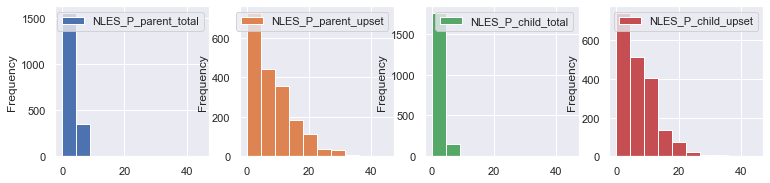

In [10]:
merge_data.loc[:,['NLES_P_parent_total', 'NLES_P_parent_upset', 'NLES_P_child_total', 'NLES_P_child_upset']].plot.hist(subplots=True, layout=(5,5), figsize=(16,16))

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

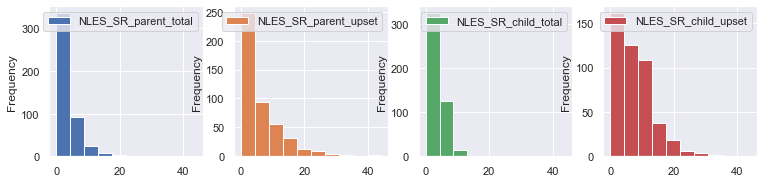

In [11]:
merge_data.loc[:,['NLES_SR_parent_total', 'NLES_SR_parent_upset', 'NLES_SR_child_total', 'NLES_SR_child_upset']].plot.hist(subplots=True, layout=(5,5), figsize=(16,16))

## Plot Depression Score Distributions

In [12]:
# load MFQ_P data and limit to kids with MRI data
mfq_p = pd.read_csv(project_home + 'phenotypic_data/9994_MFQ_P_20210322.csv', 
                     header=0, index_col='EID', skiprows=[1], engine='python')
mfq_p = mfq_p.iloc[:, 10:]
mfq_p.index.name = 'participant_id'

mfq_p_endorse_labels = ['MFQ_P_{0}'.format(str(i).zfill(2)) for i in range(1,35)] + ['MFQ_P_Total']
mfq_p.loc[:,mfq_p_endorse_labels].describe().to_csv(project_home + 'stress_analysis/MFQ_P_summary.csv')
mfq_p.loc[:,mfq_p_endorse_labels].describe()

,MFQ_P_01,MFQ_P_02,MFQ_P_03,MFQ_P_04,MFQ_P_05,MFQ_P_06,MFQ_P_07,MFQ_P_08,MFQ_P_09,MFQ_P_10,...,MFQ_P_26,MFQ_P_27,MFQ_P_28,MFQ_P_29,MFQ_P_30,MFQ_P_31,MFQ_P_32,MFQ_P_33,MFQ_P_34,MFQ_P_Total
count,2810.000000,2808.000000,2806.000000,2807.000000,2809.000000,2809.000000,2809.000000,2807.000000,2807.000000,2810.000000,...,2811.000000,2807.000000,2811.000000,2806.000000,2811.000000,2810.000000,2807.000000,2806.000000,2808.000000,2816.000000
mean,0.586121,0.226140,0.240912,0.325615,0.288715,0.155215,0.467782,0.234414,0.225864,0.577936,...,0.230167,0.271108,0.175027,0.418033,0.331555,0.245196,0.285358,0.162509,0.194801,8.981534
std,0.601309,0.462102,0.499962,0.572719,0.544610,0.414450,0.651902,0.474494,0.469604,0.660494,...,0.491957,0.525435,0.428474,0.614921,0.561832,0.478837,0.526026,0.441960,0.458636,8.734022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,56.000000


In [13]:
# load MFQ_SR data and limit to kids with MRI data
mfq_sr = pd.read_csv(project_home + 'phenotypic_data/9994_MFQ_SR_20210322.csv', 
                     header=0, index_col='EID', skiprows=[1],engine='python')
mfq_sr = mfq_sr.iloc[:, 10:]
mfq_sr.index.name = 'participant_id'

mfq_sr_endorse_labels = ['MFQ_SR_{0}'.format(str(i).zfill(2)) for i in range(1,34)] + ['MFQ_SR_Total']
mfq_sr.loc[:,mfq_sr_endorse_labels].describe().to_csv(project_home + 'stress_analysis/MFQ_SR_summary.csv')
mfq_sr.loc[:,mfq_sr_endorse_labels].describe()

,MFQ_SR_01,MFQ_SR_02,MFQ_SR_03,MFQ_SR_04,MFQ_SR_05,MFQ_SR_06,MFQ_SR_07,MFQ_SR_08,MFQ_SR_09,MFQ_SR_10,...,MFQ_SR_25,MFQ_SR_26,MFQ_SR_27,MFQ_SR_28,MFQ_SR_29,MFQ_SR_30,MFQ_SR_31,MFQ_SR_32,MFQ_SR_33,MFQ_SR_Total
count,2297.000000,2297.000000,2296.000000,2297.000000,2296.000000,2297.000000,2295.000000,2296.000000,2296.000000,2297.000000,...,2296.000000,2296.000000,2296.000000,2295.000000,2291.000000,2295.000000,2295.000000,2295.000000,2294.000000,2299.000000
mean,0.601654,0.272965,0.549652,0.666957,0.695122,0.370919,0.675381,0.263066,0.389808,0.905529,...,0.304443,0.424652,0.447300,0.236166,0.515059,0.373856,0.233551,0.598257,0.595902,13.922140
std,0.646120,0.527077,0.725610,0.777017,0.764286,0.638479,0.778179,0.565958,0.671914,0.773161,...,0.611507,0.686301,0.690307,0.550817,0.715466,0.666561,0.535902,0.763599,0.778696,11.594638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,19.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,64.000000


In [14]:
# load ESWAN data and limit to kids with MRI data
eswan = pd.read_csv(project_home + 'phenotypic_data/9994_ESWAN_20210322.csv', 
                     header=0, index_col='EID', skiprows=[1])
eswan = eswan.iloc[:, 10:]
eswan.index.name = 'participant_id'

# score the eswan
eswan['ESWAN_MDD_mean'] = eswan.loc[:,['MDD_1A','MDD_1B','MDD_2A','MDD_2B','MDD_3A','MDD_3B','MDD_4','MDD_5','MDD_6',
                        'MDD_7','MDD_8A','MDD_8B','MDD_9']].mean(axis=1, skipna=True)

eswan_endorse_labels = ['MDD_1A','MDD_1B','MDD_2A','MDD_2B','MDD_3A','MDD_3B','MDD_4','MDD_5','MDD_6',
                        'MDD_7','MDD_8A','MDD_8B','MDD_9','ESWAN_MDD_mean']

eswan.loc[:,eswan_endorse_labels].describe().to_csv(project_home + 'stress_analysis/ESWAN_summary.csv')
eswan.loc[:,eswan_endorse_labels].describe()

,MDD_1A,MDD_1B,MDD_2A,MDD_2B,MDD_3A,MDD_3B,MDD_4,MDD_5,MDD_6,MDD_7,MDD_8A,MDD_8B,MDD_9,ESWAN_MDD_mean
count,2838.000000,2834.000000,2837.000000,2836.000000,2839.000000,2837.000000,2836.000000,2834.000000,2836.000000,2831.000000,2831.000000,2827.000000,2832.000000,2840.000000
mean,0.111346,0.437191,-0.144871,-0.464739,-0.241282,-0.117025,-0.098731,-0.130910,-0.414669,-0.024726,0.794419,0.283693,-0.655367,-0.052224
std,1.116230,1.221833,1.207560,1.172205,1.167706,1.215083,1.156891,1.003775,1.183715,1.252597,1.311050,1.215388,1.295815,0.804696
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-2.000000,-0.384615
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.076923
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.384615
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [15]:
# merge with MRI samp
merge_data = merge_data.merge(mfq_p,left_index = True, right_index = True)
merge_data = merge_data.merge(mfq_sr, left_index = True, right_index = True)
merge_data = merge_data.merge(eswan.loc[:,eswan_endorse_labels], left_index = True, right_index = True)
merge_data.to_csv(project_home + 'stress_analysis/complete_samp_data_20210826.csv')
merge_data.describe().to_csv(project_home + 'stress_analysis/summary_samp_data_20210826.csv')

In [16]:
merge_data.describe()

,Sex,Age,EHQ_Total,NLES_SR_01a,NLES_SR_01b,NLES_SR_01c,NLES_SR_02a,NLES_SR_02b,NLES_SR_02c,NLES_SR_03a,...,MDD_3A,MDD_3B,MDD_4,MDD_5,MDD_6,MDD_7,MDD_8A,MDD_8B,MDD_9,ESWAN_MDD_mean
count,1279.000000,1279.000000,1272.000000,460.000000,61.000000,33.000000,460.000000,117.000000,90.000000,458.000000,...,1278.000000,1277.000000,1279.000000,1276.000000,1275.000000,1274.000000,1274.000000,1273.000000,1277.000000,1279.000000
mean,0.339328,10.942980,59.771281,0.071739,0.786885,2.424242,0.186957,1.025641,3.088889,0.288210,...,-0.219875,-0.102584,-0.107897,-0.177900,-0.387451,0.041601,0.809262,0.321288,-0.646829,-0.037020
std,0.473666,2.130848,51.502681,0.258336,0.838943,1.392621,0.390301,0.712711,1.303793,0.453424,...,1.179708,1.218188,1.144187,0.997494,1.145806,1.224519,1.287639,1.189443,1.293739,0.791902
min,0.000000,7.253821,-100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,9.162274,48.985000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-2.000000,-0.384615
50%,0.000000,10.520419,80.000000,0.000000,1.000000,2.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.076923
75%,1.000000,12.465491,94.470000,0.000000,2.000000,3.000000,0.000000,2.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.384615
max,1.000000,15.987451,100.000000,1.000000,2.000000,5.000000,1.000000,2.000000,5.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.307692


array([[<AxesSubplot:ylabel='Frequency'>]], dtype=object)

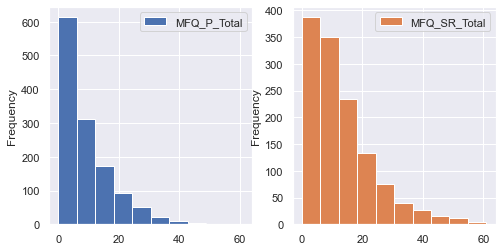

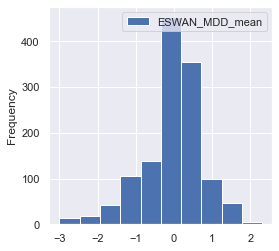

In [17]:
merge_data.loc[:,['MFQ_P_Total','MFQ_SR_Total']].plot(kind='hist', subplots=True, layout=(1,2), figsize=(8,4))
merge_data.loc[:,['ESWAN_MDD_mean']].plot(kind='hist', subplots=True, layout=(1,1), figsize=(4,4))

## Examine correlations between stress and depression 

In [18]:
stressvar=['NLES_SR_TotalEvents', 'NLES_SR_Upset_Total', 'NLES_P_TotalEvents', 'NLES_P_Upset_Total',
           'NLES_SR_parent_total', 'NLES_SR_parent_upset', 'NLES_SR_child_total', 'NLES_SR_child_upset', 
           'NLES_P_parent_total', 'NLES_P_parent_upset', 'NLES_P_child_total', 'NLES_P_child_upset']
depvar=['MFQ_P_Total', 'MFQ_SR_Total', 'ESWAN_MDD_mean']
data=pd.read_csv(project_home + 'stress_analysis/complete_samp_data_20210826.csv', index_col=0)

In [19]:
corr= data.loc[:,depvar + stressvar].corr(method='spearman')
corr 

,MFQ_P_Total,MFQ_SR_Total,ESWAN_MDD_mean,NLES_SR_TotalEvents,NLES_SR_Upset_Total,NLES_P_TotalEvents,NLES_P_Upset_Total,NLES_SR_parent_total,NLES_SR_parent_upset,NLES_SR_child_total,NLES_SR_child_upset,NLES_P_parent_total,NLES_P_parent_upset,NLES_P_child_total,NLES_P_child_upset
MFQ_P_Total,1.000000,0.220269,0.468465,0.130563,0.159480,0.264143,0.308752,0.139806,0.148150,0.068604,0.119593,0.262256,0.296792,0.170562,0.222216
MFQ_SR_Total,0.220269,1.000000,0.148720,0.244745,0.254457,0.047351,0.058382,0.224313,0.235936,0.140715,0.190342,0.045036,0.072262,-0.013234,0.022535
ESWAN_MDD_mean,0.468465,0.148720,1.000000,0.046281,0.070982,0.138423,0.174268,0.048813,0.053059,0.039281,0.069468,0.119652,0.139034,0.119542,0.156366
NLES_SR_TotalEvents,0.130563,0.244745,0.046281,1.000000,0.920640,0.242807,0.300662,0.829014,0.818545,0.803280,0.759141,0.213261,0.255757,0.245414,0.248466
NLES_SR_Upset_Total,0.159480,0.254457,0.070982,0.920640,1.000000,0.242202,0.302987,0.776965,0.848407,0.745472,0.844873,0.222395,0.262393,0.228806,0.244431
NLES_P_TotalEvents,0.264143,0.047351,0.138423,0.242807,0.242202,1.000000,0.806258,0.232526,0.229627,0.132633,0.173179,0.786196,0.725923,0.663512,0.627417
NLES_P_Upset_Total,0.308752,0.058382,0.174268,0.300662,0.302987,0.806258,1.000000,0.273434,0.280120,0.198119,0.236671,0.754796,0.864423,0.689215,0.799001
NLES_SR_parent_total,0.139806,0.224313,0.048813,0.829014,0.776965,0.232526,0.273434,1.000000,0.933843,0.442386,0.429022,0.258910,0.291204,0.146215,0.166245
NLES_SR_parent_upset,0.148150,0.235936,0.053059,0.818545,0.848407,0.229627,0.280120,0.933843,1.000000,0.452393,0.483155,0.263403,0.302658,0.140989,0.158629
NLES_SR_child_total,0.068604,0.140715,0.039281,0.803280,0.745472,0.132633,0.198119,0.442386,0.452393,1.000000,0.854828,0.082003,0.119509,0.237890,0.219956


In [20]:
stressvar=['NLES_P_TotalEvents','NLES_P_Upset_Total']
depvar=['MFQ_P_Total']
actvar=['VentralAttn_mean', "Default_mean"]
data = pd.read_csv(project_home + 'stress_analysis/full_data_20220124.csv', index_col=0)
data = data.loc[:, ["cond", "movie", "meanFD", "VentralAttn_mean", "Default_mean"]]
data = data.loc[data["cond"]=="negative"]
tp_data = data.loc[data["movie"]=="TP"]
tp_data.columns = ['cond', 'movie', 'tp_meanFD', 'tp_VentralAttn_mean', 'tp_Default_mean']
dm_data = data.loc[data["movie"]=="DM"]
dm_data.columns = ['cond', 'movie', 'dm_meanFD', 'dm_VentralAttn_mean', 'dm_Default_mean']
data = pd.read_csv(project_home + 'stress_analysis/full_data_20220124.csv', index_col=0)
data = data.loc[:, ['age', 'MFQ_P_Total']].drop_duplicates()
stress = pd.read_csv(project_home + 'stress_analysis/complete_samp_data_20210826.csv', index_col=0).loc[:,stressvar]
stress.index = ["sub-{0}".format(sub) for sub in stress.index]
stress.index.name = "sub"
data = data.merge(stress, how = "left", left_index = True, right_index = True)
data = data.merge(tp_data.drop(['cond', 'movie'], axis = 1), how = "left", left_index = True, right_index = True)
data = data.merge(dm_data.drop(['cond', 'movie'], axis = 1), how = "left", left_index = True, right_index = True)
data.head()

,age,MFQ_P_Total,NLES_P_TotalEvents,NLES_P_Upset_Total,tp_meanFD,tp_VentralAttn_mean,tp_Default_mean,dm_meanFD,dm_VentralAttn_mean,dm_Default_mean
sub,,,,,,,,,,
sub-NDARAA504CRN,9.165297,-0.596226,8.0,11.0,0.480957,0.069611,-0.006217,0.599214,0.039116,0.015459
sub-NDARAA948VFH,7.982660,-0.864325,3.0,1.0,0.102532,0.102776,-0.029103,0.107775,0.084077,-0.014701
sub-NDARAB348EWR,5.805384,0.239258,NaN,NaN,0.372852,0.081755,-0.019531,NaN,NaN,NaN
sub-NDARAB458VK9,12.836185,-0.032912,7.0,23.0,0.340212,0.085313,-0.034039,0.407245,-0.025748,0.022653
sub-NDARAB514MAJ,5.055213,1.191076,NaN,NaN,0.522863,0.053051,0.015619,NaN,NaN,NaN


In [21]:
corr= data.corr(method='spearman')
corr 

,age,MFQ_P_Total,NLES_P_TotalEvents,NLES_P_Upset_Total,tp_meanFD,tp_VentralAttn_mean,tp_Default_mean,dm_meanFD,dm_VentralAttn_mean,dm_Default_mean
age,1.000000,0.095574,0.159531,0.209600,-0.070762,0.120897,-0.016426,-0.060768,0.109750,0.071207
MFQ_P_Total,0.095574,1.000000,0.323825,0.358943,0.017396,0.000263,0.064653,-0.013808,0.095932,0.013998
NLES_P_TotalEvents,0.159531,0.323825,1.000000,0.807485,0.001068,-0.008838,-0.020399,-0.018841,0.043925,-0.015484
NLES_P_Upset_Total,0.209600,0.358943,0.807485,1.000000,0.014062,0.019018,-0.017172,0.035232,0.026192,0.008489
tp_meanFD,-0.070762,0.017396,0.001068,0.014062,1.000000,-0.131546,0.093468,0.624773,-0.013708,-0.002340
tp_VentralAttn_mean,0.120897,0.000263,-0.008838,0.019018,-0.131546,1.000000,-0.154146,-0.050522,0.212359,0.075963
tp_Default_mean,-0.016426,0.064653,-0.020399,-0.017172,0.093468,-0.154146,1.000000,0.008387,-0.027922,0.014661
dm_meanFD,-0.060768,-0.013808,-0.018841,0.035232,0.624773,-0.050522,0.008387,1.000000,-0.070651,-0.049424
dm_VentralAttn_mean,0.109750,0.095932,0.043925,0.026192,-0.013708,0.212359,-0.027922,-0.070651,1.000000,0.050968
dm_Default_mean,0.071207,0.013998,-0.015484,0.008489,-0.002340,0.075963,0.014661,-0.049424,0.050968,1.000000


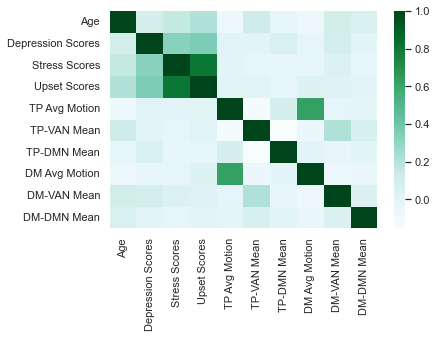

In [22]:
sns.set(font_scale = 1)
heatmap_corr = sns.heatmap(corr, cmap = "BuGn", annot=False).set(
        xticklabels=['Age','Depression Scores','Stress Scores','Upset Scores','TP Avg Motion','TP-VAN Mean','TP-DMN Mean',
                     'DM Avg Motion','DM-VAN Mean','DM-DMN Mean'],
        yticklabels=['Age','Depression Scores','Stress Scores','Upset Scores','TP Avg Motion','TP-VAN Mean','TP-DMN Mean',
                     'DM Avg Motion','DM-VAN Mean','DM-DMN Mean']
)
fig = plt.savefig("/Users/emilyfurtado/Box/HBN_study/stress_analysis/figures/stress-dep-act.png",bbox_inches = 'tight', dpi = 300)

In [ ]:
sns.scatterplot(x=data['NLES_SR_parent_upset'], y=data['MFQ_SR_Total'])
plt.figure()
sns.scatterplot(x=data['NLES_SR_child_upset'], y=data['MFQ_SR_Total'])

KeyError: 'NLES_SR_parent_upset'

In [12]:
#Mean across scene for networks, age, motion, stress, MFQ total 
act_data = pd.read_csv(project_home +"stress_analysis/neural_similarity_analysis/activation/full_sample/dynamic_movieDM/subject_level_peak_activation.csv", index_col = 0)
act_data.index.name = "sub"
act_data["class"].replace("class01", "conflict", inplace = True)
act_data["class"].replace("class02", "highstress", inplace = True)
act_data["class"].replace("class03", "lowstress", inplace = True)

#dep_data = pd.read_csv(project_home+"stress_analysis/full_data_20220124.csv", index_col = 0)
#dep_data = dep_data.loc[:,["MFQ_P_Total", "MFQ_SR_Total", "MDD_mean",]]
#dep_data.index.name = "sub"

stress = pd.read_csv(project_home + 'stress_analysis/complete_samp_data_20210826.csv', index_col=0)
stress.index = ["sub-{0}".format(sub) for sub in stress.index]
stress.index.name = "sub"

# merge activation and full data
#data_dm = act_data.merge(dep_data, how = "left", left_index = True, right_index = True).drop_duplicates()
data_dm = act_data.merge(stress, how = "left", left_index = True, right_index = True).drop_duplicates()


<AxesSubplot:>

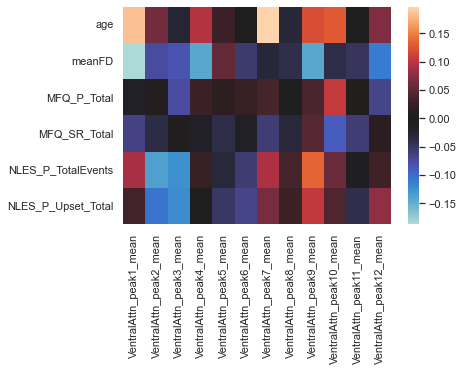

In [15]:
act_labels = ["VentralAttn_peak{0}_mean".format(x) for x in range(1,13)]
corr= data_dm.corr(method='spearman')
sns.set(font_scale = 1)
sns.heatmap(corr.loc[["age","meanFD","MFQ_P_Total", "MFQ_SR_Total","NLES_P_TotalEvents","NLES_P_Upset_Total"],act_labels],
            annot=False, center = 0)

In [13]:
for a in data_dm.columns: 
    print(a)

movie
age
site_x
female
meanFD
righthanded
sub
PPS_score
class
VentralAttn_peak1_mean
VentralAttn_peak1_max
VentralAttn_peak2_mean
VentralAttn_peak2_max
VentralAttn_peak3_mean
VentralAttn_peak3_max
VentralAttn_peak4_mean
VentralAttn_peak4_max
VentralAttn_peak5_mean
VentralAttn_peak5_max
VentralAttn_peak6_mean
VentralAttn_peak6_max
VentralAttn_peak7_mean
VentralAttn_peak7_max
VentralAttn_peak8_mean
VentralAttn_peak8_max
VentralAttn_peak9_mean
VentralAttn_peak9_max
VentralAttn_peak10_mean
VentralAttn_peak10_max
VentralAttn_peak11_mean
VentralAttn_peak11_max
VentralAttn_peak12_mean
VentralAttn_peak12_max
VentralAttn_peak13_mean
VentralAttn_peak13_max
CinguloOperc_peak1_mean
CinguloOperc_peak1_max
CinguloOperc_peak2_mean
CinguloOperc_peak2_max
CinguloOperc_peak3_mean
CinguloOperc_peak3_max
CinguloOperc_peak4_mean
CinguloOperc_peak4_max
CinguloOperc_peak5_mean
CinguloOperc_peak5_max
CinguloOperc_peak6_mean
CinguloOperc_peak6_max
CinguloOperc_peak7_mean
CinguloOperc_peak7_max
Default_peak1_m

In [ ]:
test 